In [1]:
# Mounting the Drive to Google Colab
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
# load data
data = pd.read_csv(r"/drive/MyDrive/Colab Notebooks/wifi.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Wifi 1  2000 non-null   int64
 1   Wifi 2  2000 non-null   int64
 2   Wifi 3  2000 non-null   int64
 3   Wifi 4  2000 non-null   int64
 4   Wifi 5  2000 non-null   int64
 5   Wifi 6  2000 non-null   int64
 6   Wifi 7  2000 non-null   int64
 7   Room    2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [5]:
data.head()

,Wifi 1,Wifi 2,Wifi 3,Wifi 4,Wifi 5,Wifi 6,Wifi 7,Room
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1


In [9]:
# perform one hot encoding using the pandas get_dummies function
one_hot = pd.get_dummies(data['Room'])

# merge the one hot encoded variables back into the original dataframe
df = pd.concat([data, one_hot], axis=1)

# drop the original room column
df = df.drop('Room', axis=1)

In [10]:
df.head()

,Wifi 1,Wifi 2,Wifi 3,Wifi 4,Wifi 5,Wifi 6,Wifi 7,1,2,3,4
0,-64,-56,-61,-66,-71,-82,-81,1,0,0,0
1,-68,-57,-61,-65,-71,-85,-85,1,0,0,0
2,-63,-60,-60,-67,-76,-85,-84,1,0,0,0
3,-61,-60,-68,-62,-77,-90,-80,1,0,0,0
4,-63,-65,-60,-63,-77,-81,-87,1,0,0,0


In [14]:
# reading the data in dataframe
X = df.iloc[:,:-4]
y = df.iloc[:,-4:]
print(X.shape)
print(y.shape)

(2000, 7)
(2000, 4)


In [15]:
# show first 5 rows, transpose because too many columns
X.head().T

,0,1,2,3,4
Wifi 1,-64,-68,-63,-61,-63
Wifi 2,-56,-57,-60,-60,-65
Wifi 3,-61,-61,-60,-68,-60
Wifi 4,-66,-65,-67,-62,-63
Wifi 5,-71,-71,-76,-77,-77
Wifi 6,-82,-85,-85,-90,-81
Wifi 7,-81,-85,-84,-80,-87


In [16]:
# counts of each manign and belign value in target column
y.value_counts()

1  2  3  4
0  0  0  1    500
      1  0    500
   1  0  0    500
1  0  0  0    500
dtype: int64

In [17]:
# splitting to training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 7)
(400, 7)
(1600, 4)
(400, 4)


In [18]:
# standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [21]:
# Neurons in Hidden Layers
L1 = 64
L2 = 128

# Model Architecture
model = Sequential()
model.add(Dense(L1, input_dim=7, activation="relu"))
model.add(Dense(L2, activation="relu"))

# output layer
model.add(Dense(4, activation="softmax"))

# compile nerual network
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# training model
history = model.fit(X_train, y_train, epochs=20, batch_size=100, validation_data=(X_test, y_test))

Epoch 1/20
16/16 [==============================] - 1s 12ms/step - loss: 1.0249 - accuracy: 0.7200 - val_loss: 0.7745 - val_accuracy: 0.8125
Epoch 2/20
16/16 [==============================] - 0s 4ms/step - loss: 0.5885 - accuracy: 0.8481 - val_loss: 0.4459 - val_accuracy: 0.8800
Epoch 3/20
16/16 [==============================] - 0s 3ms/step - loss: 0.3412 - accuracy: 0.9325 - val_loss: 0.2764 - val_accuracy: 0.9350
Epoch 4/20
16/16 [==============================] - 0s 3ms/step - loss: 0.2124 - accuracy: 0.9531 - val_loss: 0.1990 - val_accuracy: 0.9450
Epoch 5/20
16/16 [==============================] - 0s 4ms/step - loss: 0.1508 - accuracy: 0.9606 - val_loss: 0.1518 - val_accuracy: 0.9575
Epoch 6/20
16/16 [==============================] - 0s 4ms/step - loss: 0.1212 - accuracy: 0.9644 - val_loss: 0.1268 - val_accuracy: 0.9625
Epoch 7/20
16/16 [==============================] - 0s 3ms/step - loss: 0.1040 - accuracy: 0.9675 - val_loss: 0.1142 - val_accuracy: 0.9625
Epoch 8/20
16/16 [=

# Model with initializer and regularizer 




# Kernel Regularization is the process of adding penalty factors to the network layers to alter the weight propagation through the layers which facilitate the model to converge optimally.




# Kernel initializers are used to statistically initialise the weights in the model. This will generate the weights and distribute them, it can be used as the starting weights.




# Regularization is a set of techniques that can prevent overfitting in neural networks and thus improve the accuracy of a Deep Learning model when facing completely new data from the problem domain.

In [22]:
from keras import initializers
from keras import regularizers

In [25]:
# neurons in hidden layers
L1 = 32
L2 = 64
# model architecture
model = Sequential()
model.add(Dense(L1, input_dim=7, activation="relu",
              kernel_initializer="he_normal", kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(L2, activation="relu"))

#output layer
model.add(Dense(4, activation="softmax"))

#compile model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# training model
history2 = model.fit(X_train, y_train, epochs=20, batch_size=100, validation_data=(X_test, y_test))

Epoch 1/20
16/16 [==============================] - 1s 11ms/step - loss: 2.1742 - accuracy: 0.4194 - val_loss: 1.7698 - val_accuracy: 0.6175
Epoch 2/20
16/16 [==============================] - 0s 3ms/step - loss: 1.5231 - accuracy: 0.7631 - val_loss: 1.3131 - val_accuracy: 0.8900
Epoch 3/20
16/16 [==============================] - 0s 3ms/step - loss: 1.1771 - accuracy: 0.9131 - val_loss: 1.0785 - val_accuracy: 0.9250
Epoch 4/20
16/16 [==============================] - 0s 4ms/step - loss: 0.9947 - accuracy: 0.9356 - val_loss: 0.9496 - val_accuracy: 0.9350
Epoch 5/20
16/16 [==============================] - 0s 4ms/step - loss: 0.8883 - accuracy: 0.9438 - val_loss: 0.8664 - val_accuracy: 0.9350
Epoch 6/20
16/16 [==============================] - 0s 3ms/step - loss: 0.8159 - accuracy: 0.9506 - val_loss: 0.8092 - val_accuracy: 0.9375
Epoch 7/20
16/16 [==============================] - 0s 4ms/step - loss: 0.7615 - accuracy: 0.9544 - val_loss: 0.7584 - val_accuracy: 0.9400
Epoch 8/20
16/16 [=

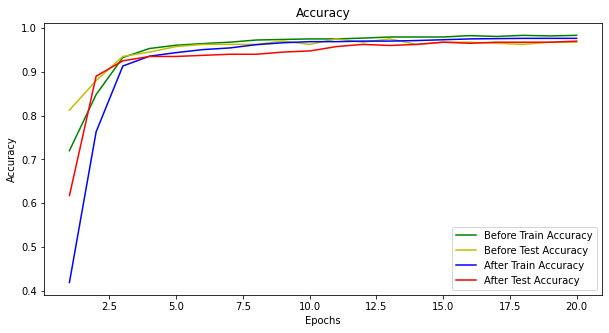

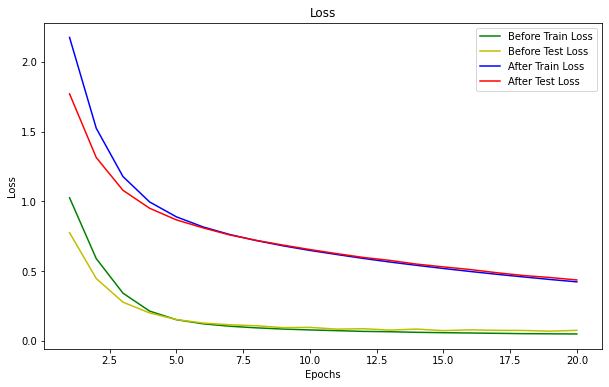

In [26]:
# model evaluation with visualisation
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc)+1)

# model evaluation with visualisation
acc2 = history2.history["accuracy"]
val_acc2 = history2.history["val_accuracy"]
loss2 = history2.history["loss"]
val_loss2 = history2.history["val_loss"]

epochs2 = range(1, len(acc2)+1)

# visualisation
plt.figure(figsize=(10,5))
plt.plot(epochs, acc, "g", label="Before Train Accuracy")
plt.plot(epochs, val_acc, "y", label="Before Test Accuracy")
plt.plot(epochs2, acc2, "b", label="After Train Accuracy")
plt.plot(epochs2, val_acc2, "r", label="After Test Accuracy")
plt.legend()
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.figure(figsize=(10,6))
plt.plot(epochs, loss,'g', label='Before Train Loss')
plt.plot(epochs, val_loss, 'y', label='Before Test Loss')
plt.plot(epochs2, loss2,'b', label='After Train Loss')
plt.plot(epochs2, val_loss2, 'r', label='After Test Loss')
plt.legend()
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()